<a href="https://colab.research.google.com/github/shila121/projects/blob/main/Churn_prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Framing the problem statement
- Develop a predictive model to identify customers who are likely to churn within the next few months

# 2.Here, we try to analyse the data using various steps mentioned below:



*  Hypothesis Testing
*   EDA(univariate/Bi-variate analysis)

*   Missing data analysis
*   Numerical data analysis

*   Outliers analysis
*   Categorical data analysis












In [99]:
#1. Hypothesis Testing
# Null Hypothesis: there is no relationship between independent variable and target
# Alternate Hypothesis : there is significant relationship between independent and dependent variable

# 1. Hypothesis Testing

In [155]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data =  pd.read_csv('Churn_Modelling.csv')

print(data.head())
print(data.columns,len(data.columns),data.shape)
print()
# categorical columns
catCols =  data.select_dtypes('object').columns
print('categorical columns of data:',catCols,len(catCols))

# numerical columns
numCols = data.select_dtypes('number').columns
print('numeric columns of data:',numCols,len(numCols))

print(data['Exited'].unique())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [157]:
catCols = ['Geography', 'Gender']#'Surname' is removed
numCols = ['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'] # 'RowNumber', 'CustomerId' is removed of no importance

data = data[['Geography', 'Gender','CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited']]

In [102]:
data.head()

,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,Female,619,42,2,0.00,1,1,1,101348.88,1
1,Spain,Female,608,41,1,83807.86,1,0,1,112542.58,0
2,France,Female,502,42,8,159660.80,3,1,0,113931.57,1
3,France,Female,699,39,1,0.00,2,0,0,93826.63,0
4,Spain,Female,850,43,2,125510.82,1,1,1,79084.10,0


In [158]:
# we will carry out z-test to know the impact of numerical column
from statsmodels.stats import weightstats as stests

significant_numCols ,in_signifiacnt_numCols = [],[]

for i in numCols:
  if i != 'Exited':
    p_val = stests.ztest(data[i],data.Exited)
    p_val = p_val[1]
    print('columns:',i,"p_val:",p_val)
    if p_val < 0.05:
      status = 'Reject Null Hypothesis,Significant predictor'
      significant_numCols.append(i)
      print(status)
      print('----------------------------------------------')
    else:
      status = 'Accept Null Hypothesis,Insignificant predictors'
      in_signifiacnt_numCols.append(i)
      print(status)
      print('-------------------------------------------------')

print('significant numerical columns :',significant_numCols,len(significant_numCols))
print('in-significant numerical columns:',in_signifiacnt_numCols,len(in_signifiacnt_numCols))

columns: CreditScore p_val: 0.0
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: Age p_val: 0.0
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: Tenure p_val: 0.0
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: Balance p_val: 0.0
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: NumOfProducts p_val: 0.0
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: HasCrCard p_val: 0.0
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: IsActiveMember p_val: 0.0
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: EstimatedSalary p_val: 0.0
Reject Null Hypothesis,Significant predictor
----------------------------------------------
significant numeri

In [159]:
# we will carry out chi-square test on the categorical columns to know their impact

from scipy.stats import chi2_contingency

significant_catCols,in_significant_catCols = [],[]

for i in catCols:
  if i != 'Exited':
    stat,p_val,dof,ex = chi2_contingency(pd.crosstab(data[i],data.Exited))
    print('columns:',i,"p_val:",p_val)
    if p_val < 0.05:
      status = 'Reject Null Hypothesis,Significant predictor'
      significant_catCols.append(i)
      print(status)
      print('----------------------------------------------')
    else:
      status = 'Accept Null Hypothesis,Insignificant predictors'
      in_significant_catCols.append(i)
      print(status)
      print('-------------------------------------------------')

print('significant categorical columns :',significant_catCols,len(significant_catCols))
print('in-significant categorical columns:',in_significant_catCols,len(in_significant_catCols))

columns: Geography p_val: 3.8303176053541544e-66
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: Gender p_val: 2.2482100097131755e-26
Reject Null Hypothesis,Significant predictor
----------------------------------------------
significant categorical columns : ['Geography', 'Gender'] 2
in-significant categorical columns: [] 0


# 2. EDA(univariate/Bi-variate analysis)

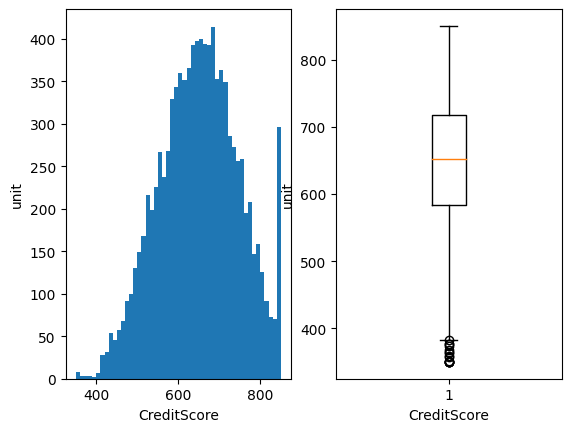

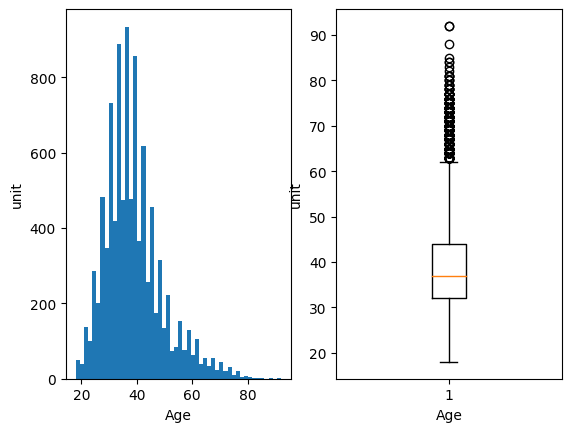

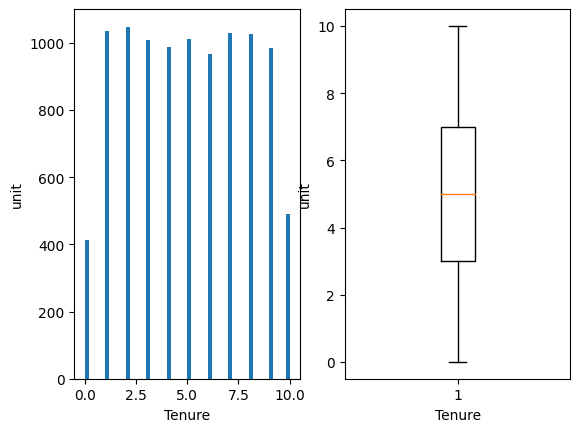

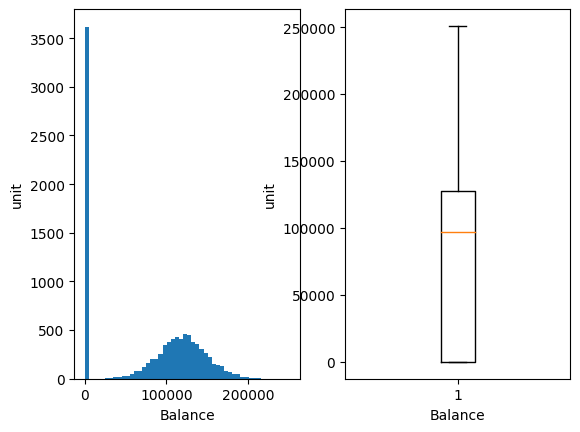

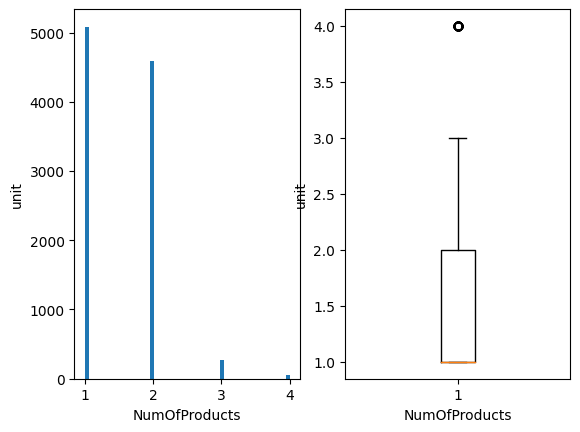

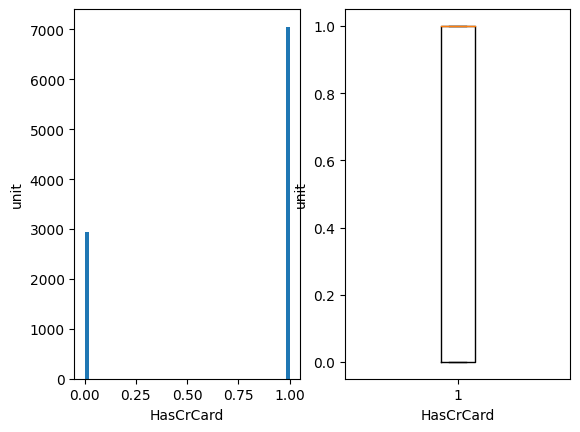

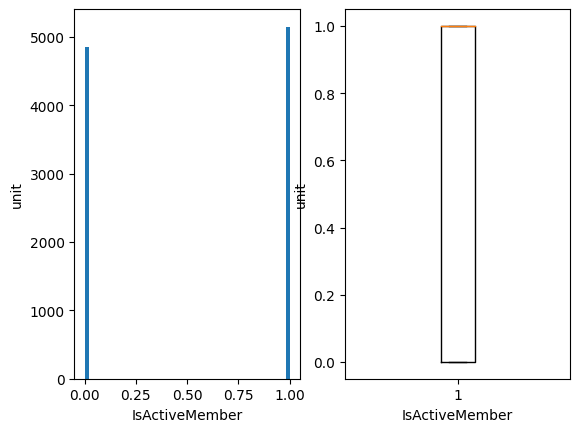

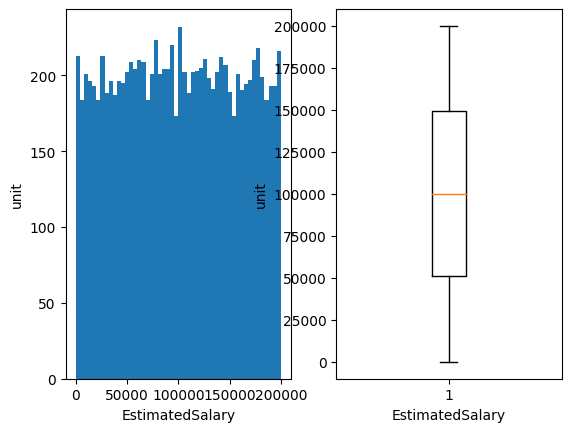

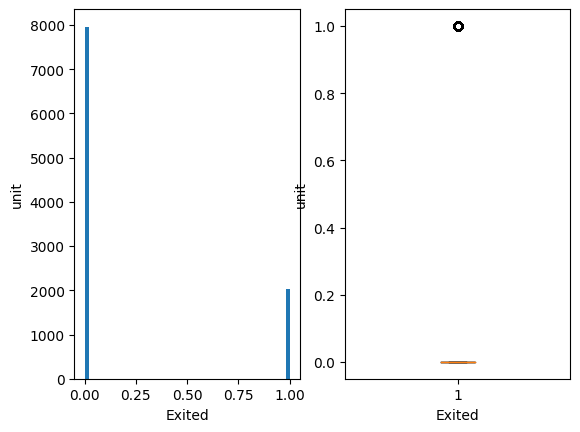

In [160]:
# step2:EDA( Univariate/Bivariate)

# Univariate analysis of numerical columns by using histogram
for i in numCols:
  plt.subplot(1,2,1)
  plt.hist(data[i],bins = 50)
  plt.xlabel(i)
  plt.ylabel('unit')

  plt.subplot(1,2,2)
  plt.boxplot(data[i])
  plt.xlabel(i)
  plt.ylabel('unit')
  plt.show()

In [161]:
# Univariate analysis of the categoriacl columns with value_counts

for i in catCols:
  print('column:',i)
  print(data[i].value_counts())
  print('--------------------------------------')

column: Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
--------------------------------------
column: Gender
Male      5457
Female    4543
Name: Gender, dtype: int64
--------------------------------------


                 CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure       

<Axes: >

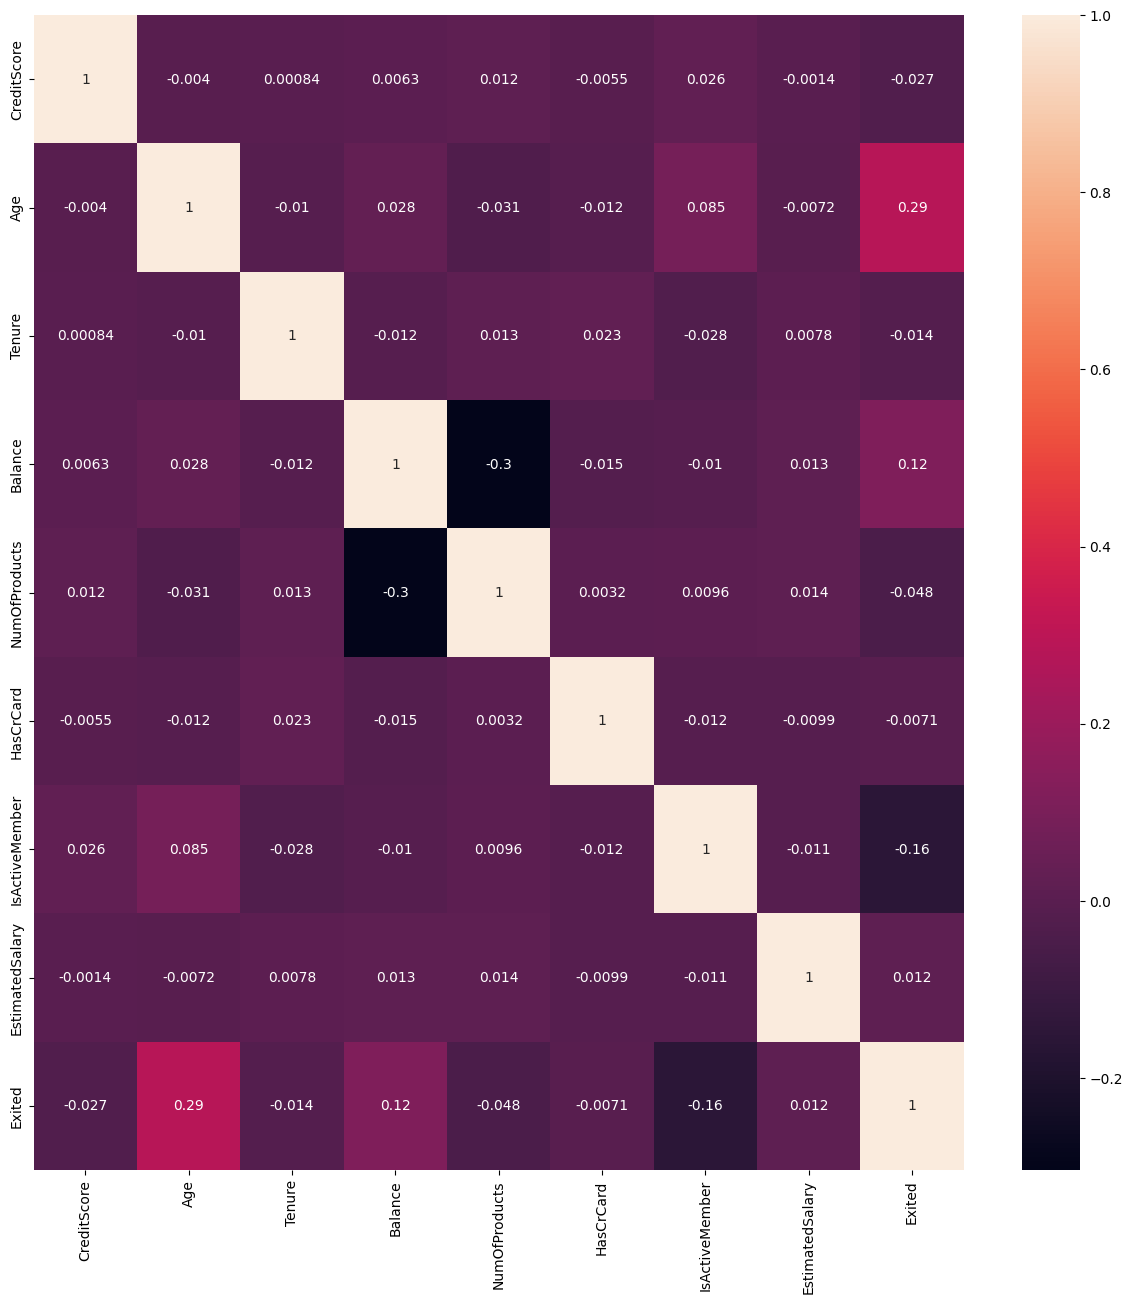

In [162]:
# Bivariate analysis of numeriacl columns by co-relation matrix
import seaborn as sns
matrix = data.corr()
print(matrix)

fig,ax = plt.subplots(figsize =(15,15))
sns.heatmap(matrix,annot = True)

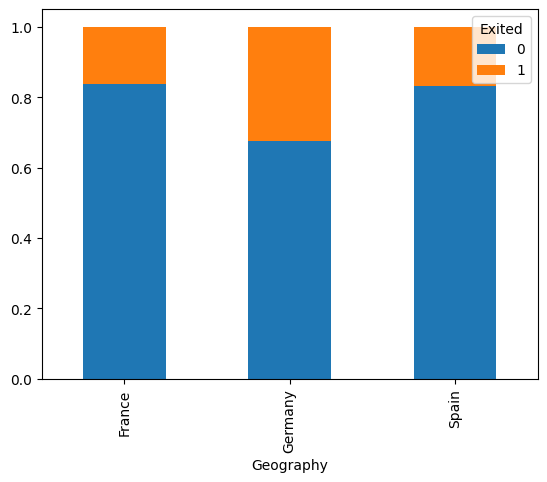

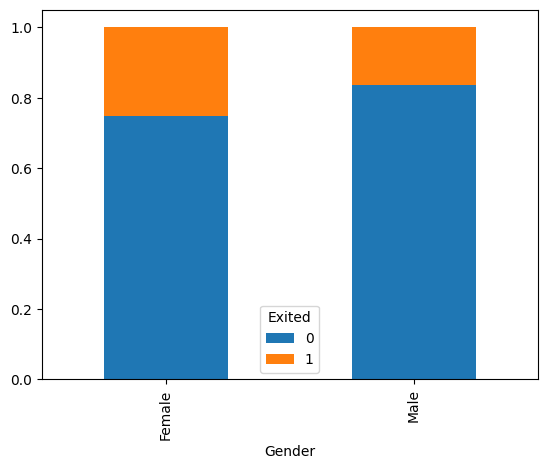

In [163]:
# Bivariate analysis of Categoriacal columns by crosstab

for i in catCols:
  category = pd.crosstab(data[i],data['Exited'])
  category.div(category.sum(1).astype(float),axis =0 ).plot(kind = 'bar',stacked = True)
  try:

    plt.show()
  except:
    pass

# 3. Missing Data Analysis

In [164]:
# Step 3:Missing data
# lets analyse if the data contains any missing values
data.isnull().sum()

Geography          0
Gender             0
CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# 4. Numerical data analysis

numerical columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'] 9
   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  
0               1        101348.88       1  
1               1        112542.58       0  
2               0        113931.57       1  
3               0         93826.63       0  
4               1         79084.10       0  
discrete columns in numericals columns: ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'] 5


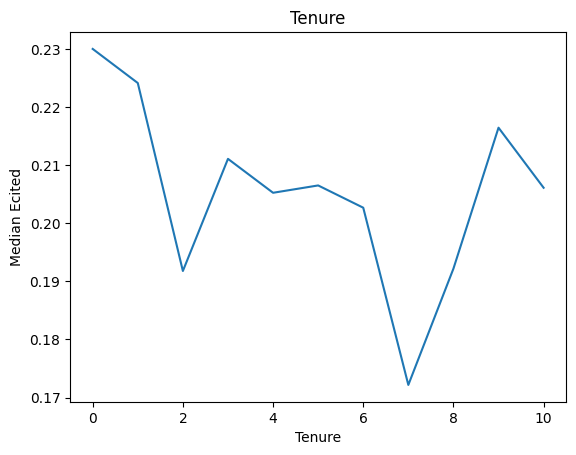

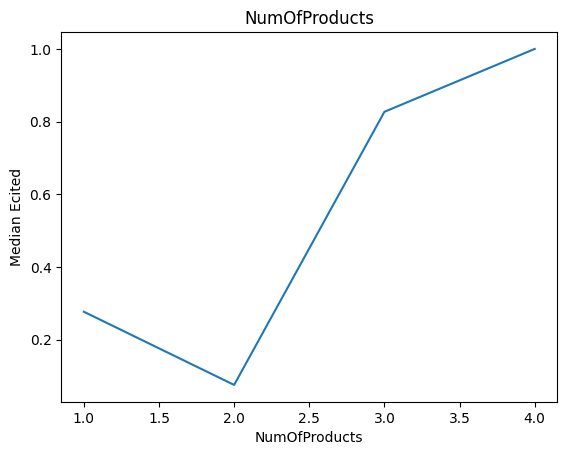

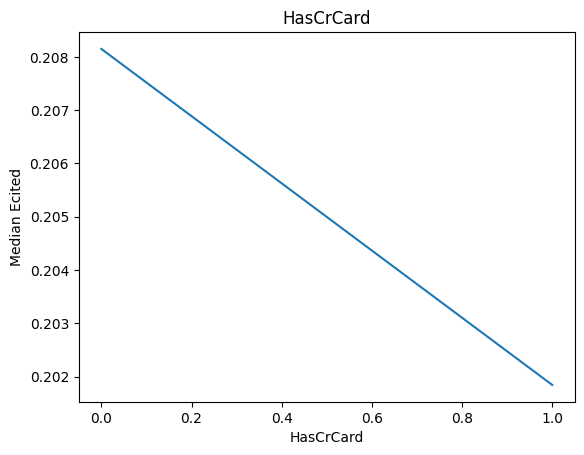

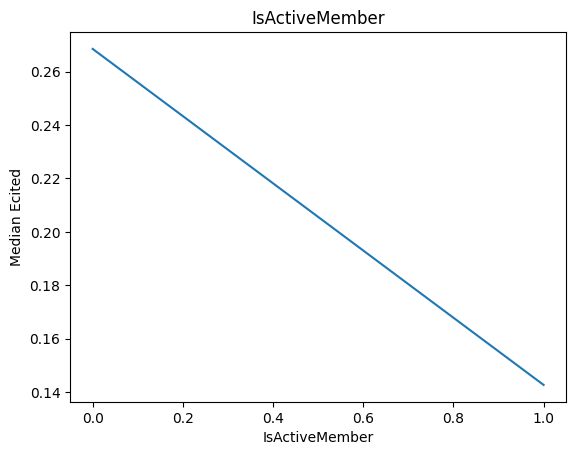

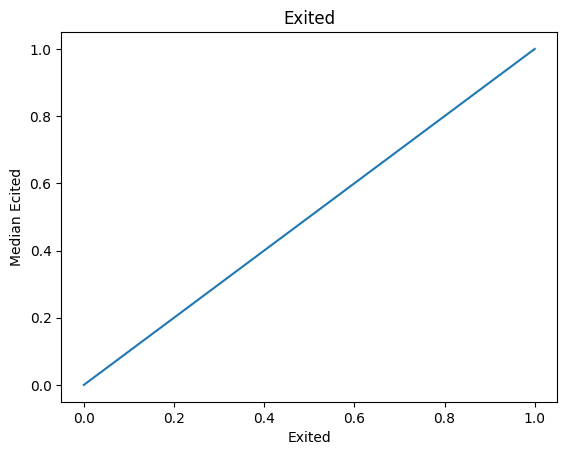

In [165]:
# step 4:Numerical data analysis

print('numerical columns:',numCols,len(numCols))

# -> 1. visualize numerical columns
print(data[numCols].head())

# ->2.lets make list of discrete variables among numerical columns

discrete_numCols = [var for var in numCols if len(data[var].unique()) < 20]
print('discrete columns in numericals columns:',discrete_numCols,len(discrete_numCols))

# visualize discrete columns
data[discrete_numCols].head()

# visualize their relationship to the target
def analyse_discrete(df,var):
  df=df.copy()
  # df[var].hist(bins=50)
  df.groupby(var)['Exited'].mean().plot()
  plt.title(var)
  plt.ylabel('Median Ecited')
  plt.show()

# lets run for each column in discrete_numCols
for var in discrete_numCols:
  analyse_discrete(data,var)



continuous numerical columns: ['CreditScore', 'Age', 'Balance', 'EstimatedSalary'] 4
   CreditScore  Age    Balance  EstimatedSalary
0          619   42       0.00        101348.88
1          608   41   83807.86        112542.58
2          502   42  159660.80        113931.57
3          699   39       0.00         93826.63
4          850   43  125510.82         79084.10


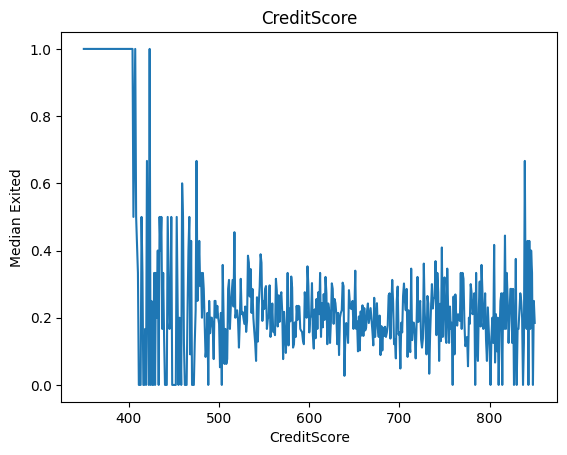

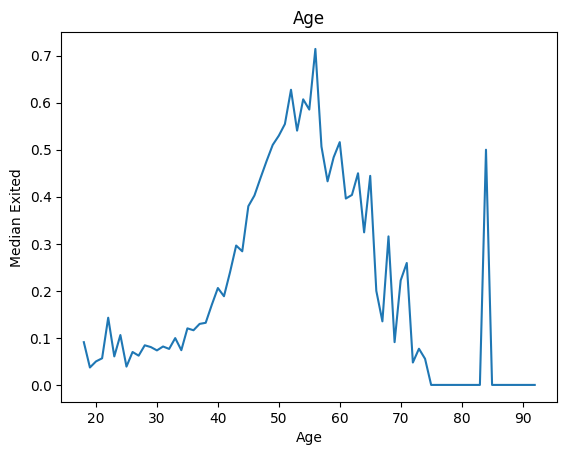

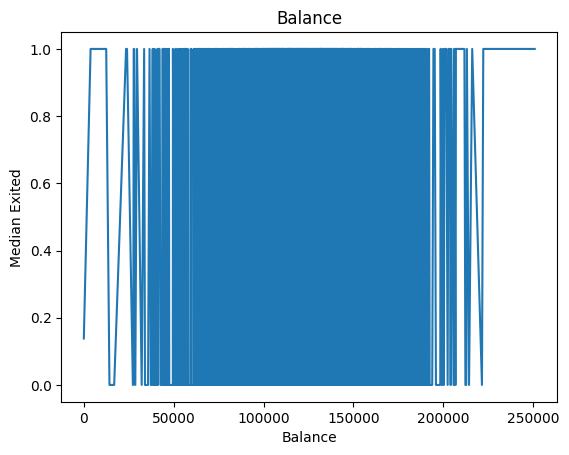

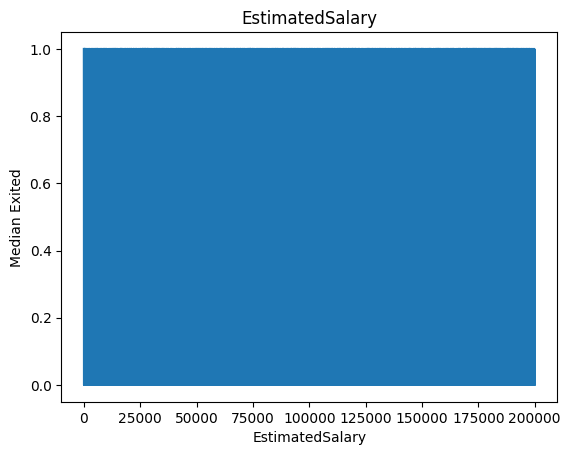

In [166]:
# ->3. lets make a list of continuous numerical column

cont_numCols = [var for var in numCols if len(data[var].unique())>20]
print('continuous numerical columns:',cont_numCols,len(cont_numCols))

# visualize
print(data[cont_numCols].head())

# # visualize their relationship to the target
def analyse_continuous(df,var):
  df=df.copy()
  # df[var].hist(bins=50)
  df.groupby(var)['Exited'].mean().plot()
  plt.title(var)
  plt.ylabel('Median Exited')
  plt.show()

# lets run for each column in cont_numCols
for var in cont_numCols:
  analyse_continuous(data,var)


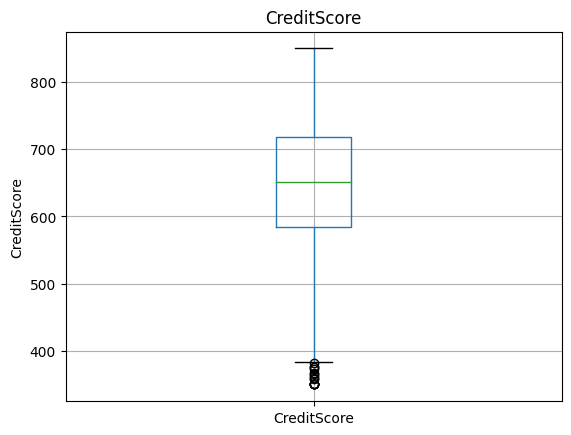

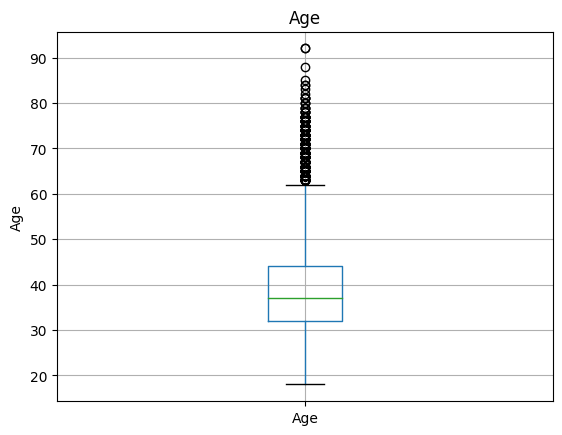

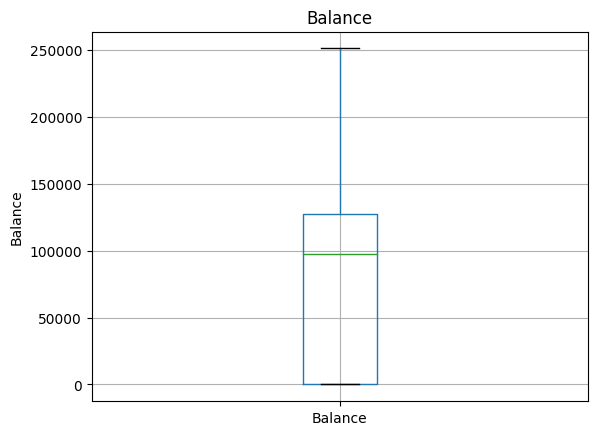

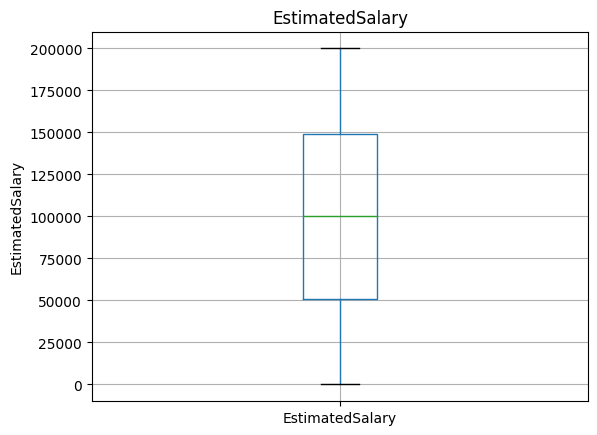

In [167]:
# step 5:Outliers presence in the data

# we will make boxplots on the continuous numeric columns to visualize the presence of outliers

def find_outliers(df,var):
  df = df.copy()
  df.boxplot(column = var)
  plt.title(var)
  plt.ylabel(var)
  plt.show()

for var in cont_numCols:
   if var not in ['RowNumber', 'CustomerId']:
    find_outliers(data,var)

# 6. Categorical data analysis

In [168]:
# step 6. Categorical data anlysis
print('categorical columns:',catCols,len(catCols))

#->1. visualize categorical variables
data[catCols].head()

categorical columns: ['Geography', 'Gender'] 2


,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [169]:
# ->2.cardinality of categorical variables
print(data[catCols].nunique())

print(data.shape)

Geography    3
Gender       2
dtype: int64
(10000, 11)


In [170]:
# ->3. analyse rare labels in categorical columns

def analyse_rare_vars(df,var,rare_percentage):
  df = df.copy()
  tmp = df.groupby(var)['Exited'].count()/len(df)
  return tmp[tmp < rare_percentage]

for i in catCols:
  print(analyse_rare_vars(data,i,0.01)) #here we,consider rare percent as 1%
  print()

Series([], Name: Exited, dtype: float64)

Series([], Name: Exited, dtype: float64)



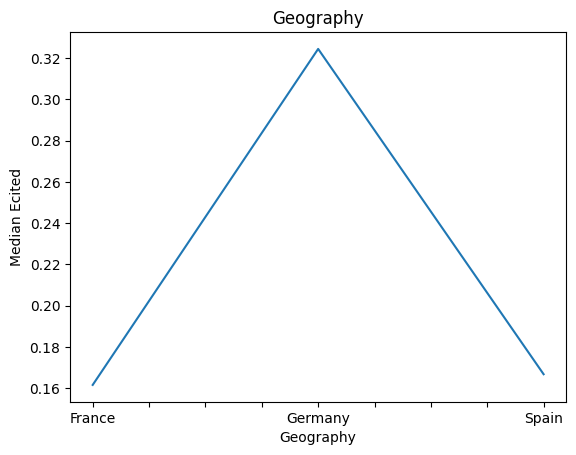

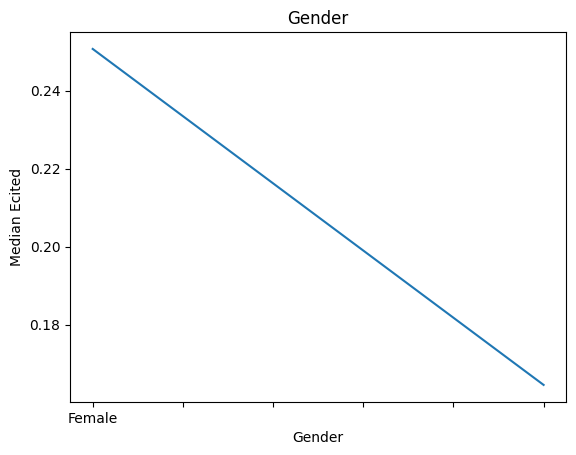

In [171]:
# ->4. analyse categorical columns to target

for i in catCols:
  analyse_discrete(data,i)

# 3. Feature Engineering

- train test split

- missing data treatment

- temporal variable treatment

- non-guassian distributed variables

- rare categorical labels treatment

- encoding categorical label

- feature scaling

#1 .Train test split

In [172]:
# ->step 1 .train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,data['Exited'],random_state = 0,test_size = 0.2)
print(X_train.shape,X_test.shape)

(8000, 11) (2000, 11)


In [173]:
X_train.columns

Index(['Geography', 'Gender', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# 2. No missing data, so no treatment is required

In [119]:
# no missing data, so no treatment is required
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [120]:
2037/7863

0.25906142693628387

# 3.Outliers Treatment

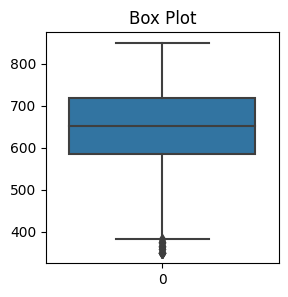

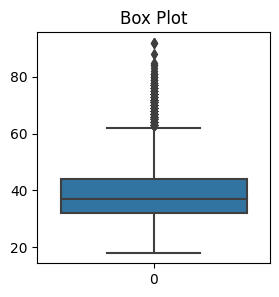

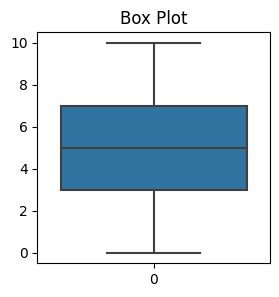

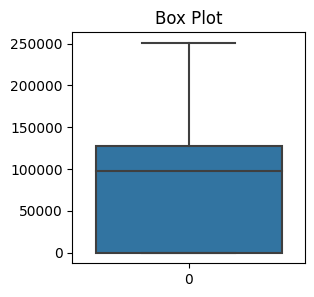

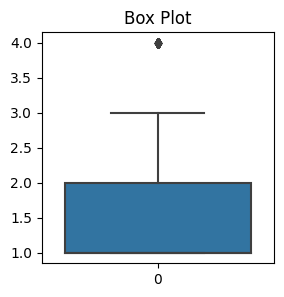

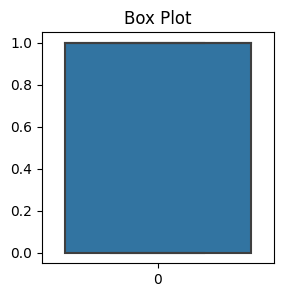

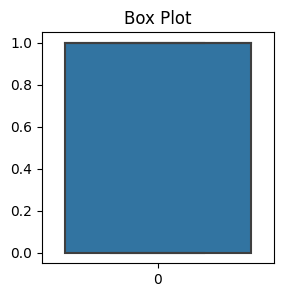

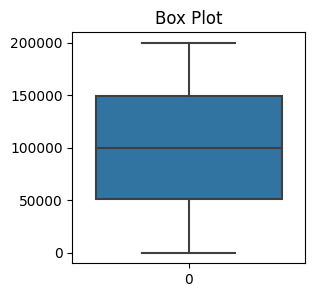

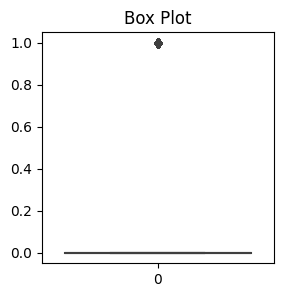

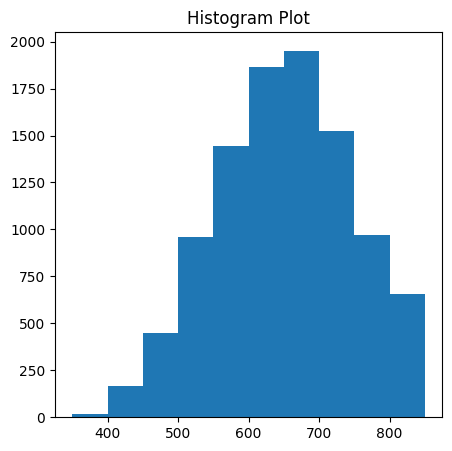

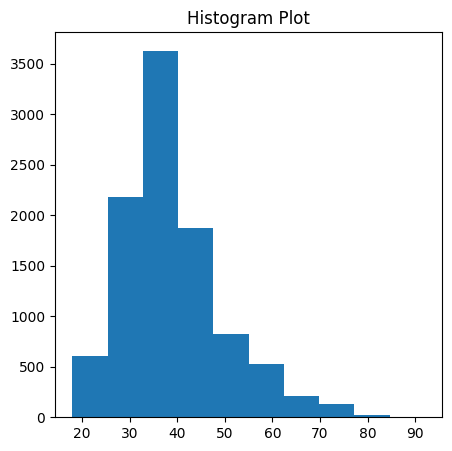

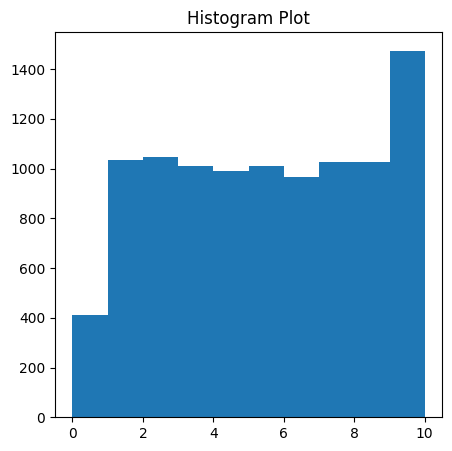

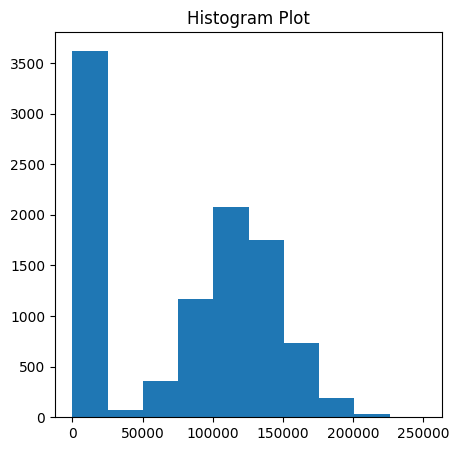

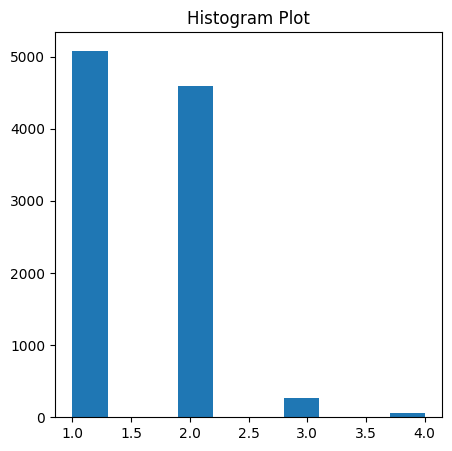

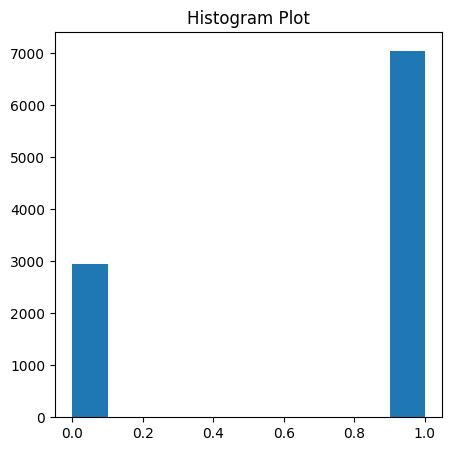

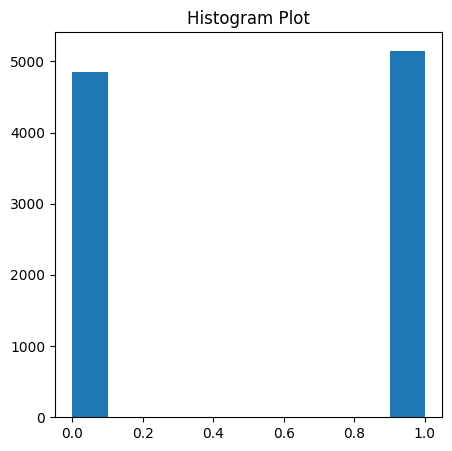

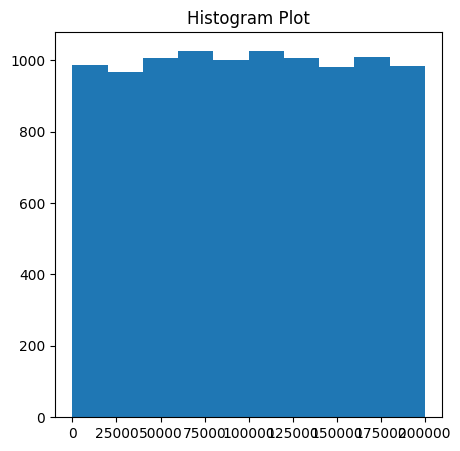

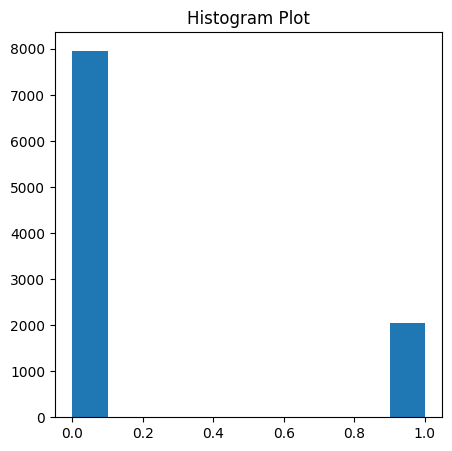

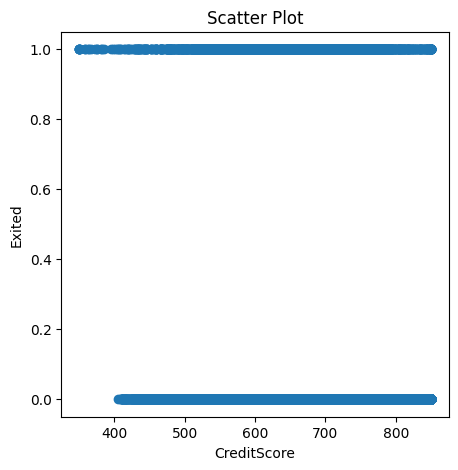

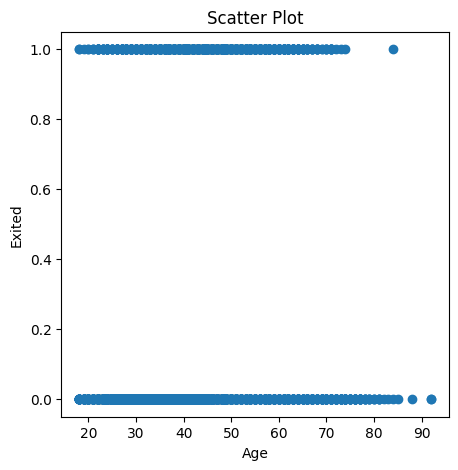

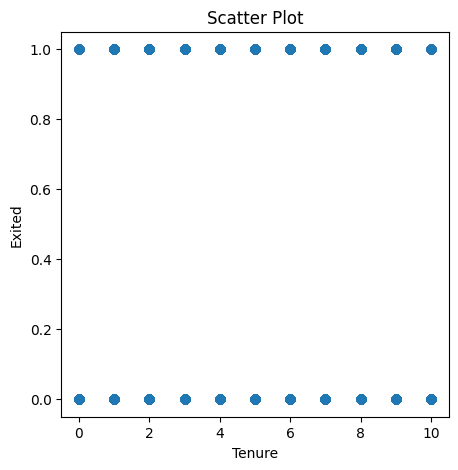

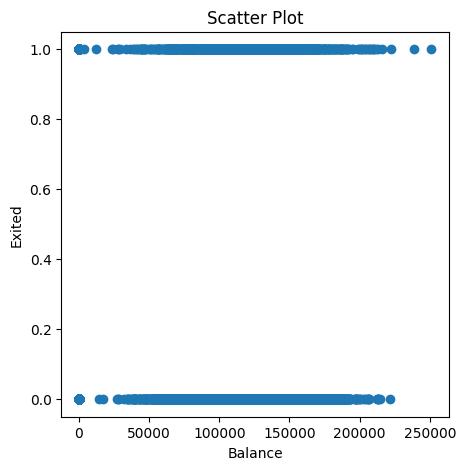

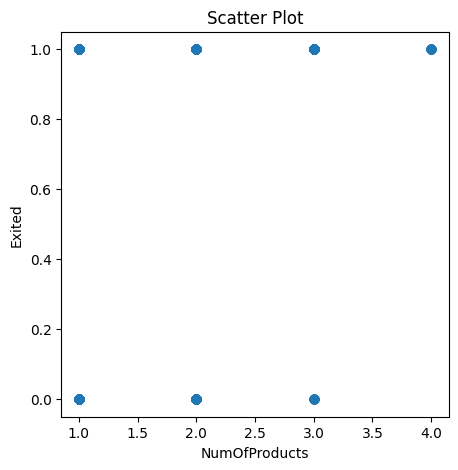

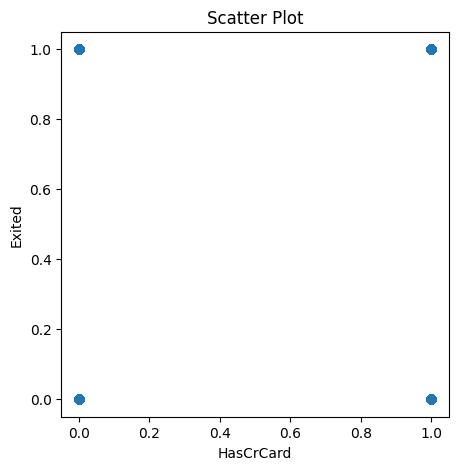

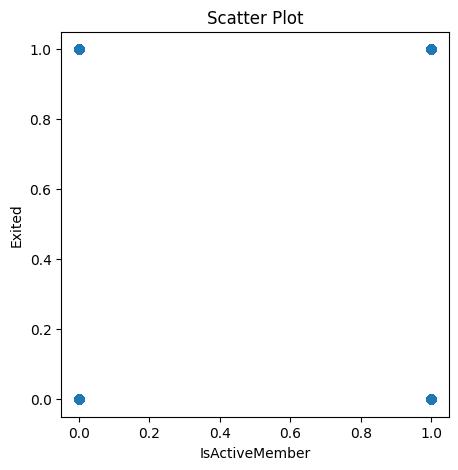

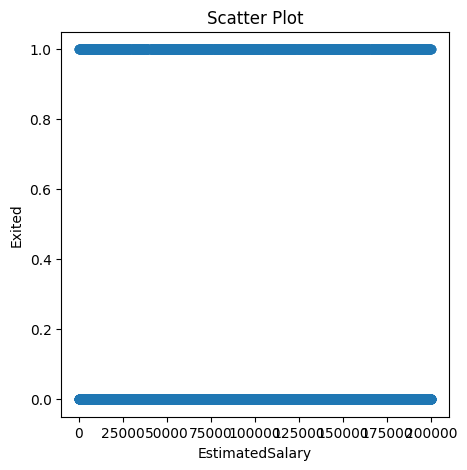

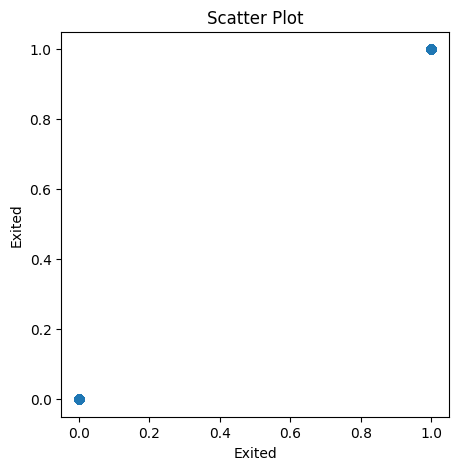

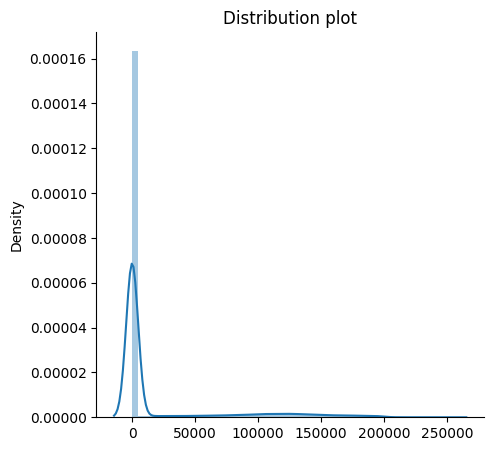

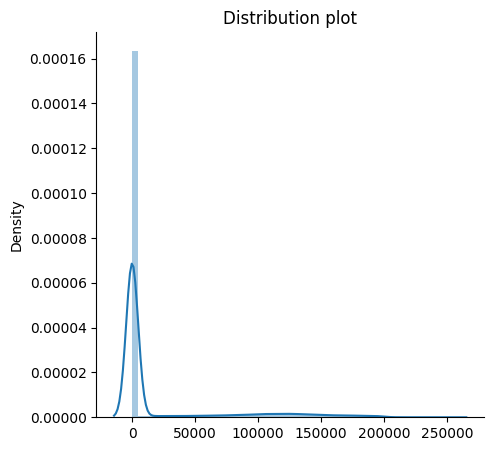

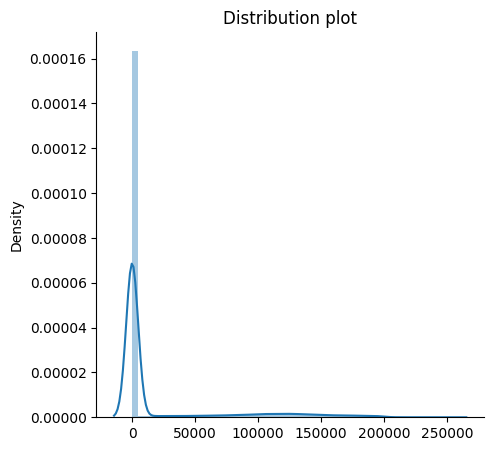

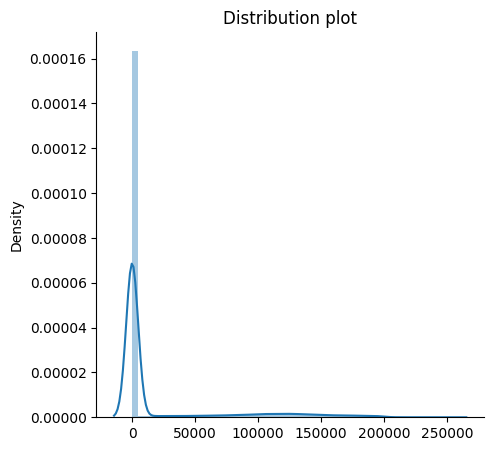

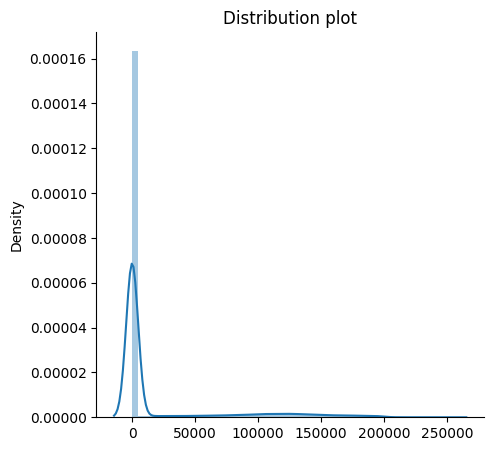

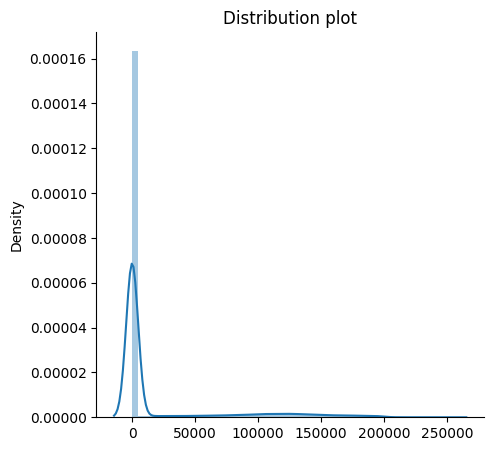

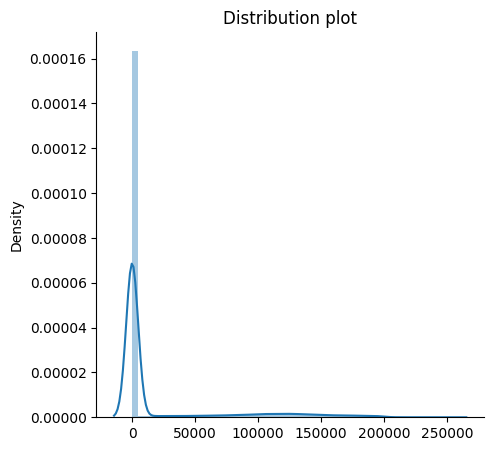

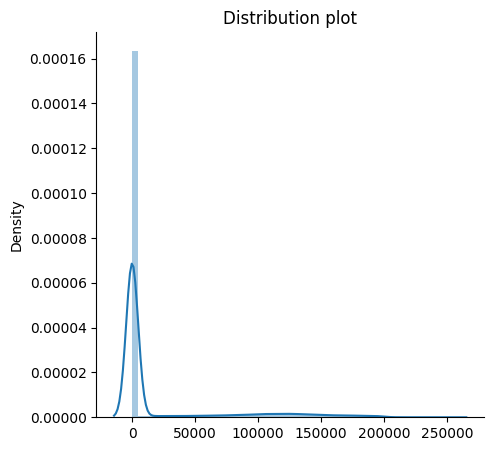

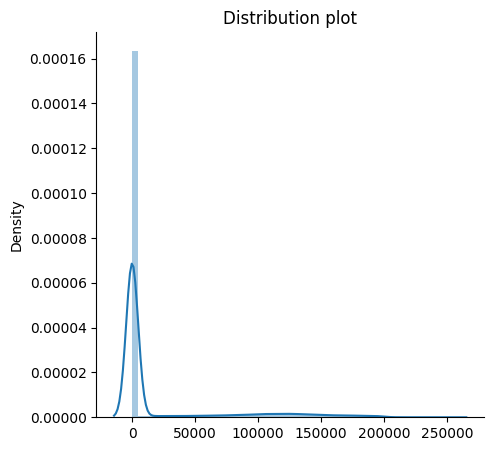

<Figure size 500x500 with 0 Axes>

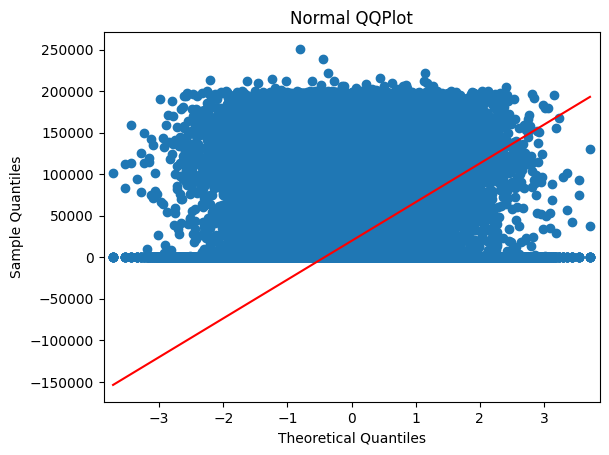

In [174]:
# outliers visualisatuin:

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot

def Box_plots(df):
  for i in df[numCols].columns:
    plt.figure(figsize=(3,3))
    plt.title("Box Plot")
    sns.boxplot(df[i])
    plt.show()
Box_plots(data)


def hist_plots(df):
  for i in df[numCols].columns:
    plt.figure(figsize=(5, 5))
    plt.hist(df[i])
    plt.title("Histogram Plot")
    plt.show()
hist_plots(data)


def scatter_plots(df1,df2):
  for i in df1[numCols].columns:
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(df1[i],df2)
    ax.set_xlabel(i)
    ax.set_ylabel('Exited')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(data[numCols],data['Exited'])

def dist_plots(df):
  for i in df[numCols].columns:
    plt.figure(figsize=(5, 5))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(data[numCols])

def qq_plots(df):
    plt.figure(figsize=(5, 5))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(data[numCols])

In [175]:
# tracing outliers

import pandas as pd
import numpy as np
cols = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

out={}
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr

    for col in df.columns:
        outliers = df[(df[col] > upper_tail[col]) | (df[col] < lower_tail[col])]
        #  out.extend(outliers[col].tolist())
        out[col] = outliers[col].tolist()

    print("Outliers:", out)

iqr_outliers(data[cols])


Outliers: {'CreditScore': [376, 376, 363, 359, 350, 350, 358, 351, 365, 367, 350, 350, 382, 373, 350], 'Age': [66, 75, 65, 73, 65, 72, 67, 67, 79, 80, 68, 75, 66, 66, 70, 63, 72, 64, 64, 70, 67, 82, 63, 69, 65, 69, 64, 65, 74, 67, 66, 67, 63, 70, 71, 72, 67, 74, 76, 66, 63, 66, 68, 67, 63, 71, 66, 69, 73, 65, 66, 64, 69, 64, 77, 74, 65, 70, 67, 69, 67, 74, 69, 74, 74, 64, 63, 63, 70, 74, 65, 72, 77, 66, 65, 74, 88, 63, 71, 63, 64, 67, 70, 68, 72, 71, 66, 75, 67, 73, 69, 76, 63, 85, 67, 74, 76, 66, 69, 66, 72, 63, 71, 63, 74, 67, 72, 72, 66, 84, 71, 66, 63, 74, 69, 84, 67, 64, 68, 66, 77, 70, 67, 79, 67, 76, 73, 66, 67, 64, 73, 76, 72, 64, 71, 63, 70, 65, 66, 65, 80, 66, 63, 63, 63, 63, 66, 74, 69, 63, 64, 76, 75, 68, 69, 77, 64, 66, 74, 71, 67, 68, 64, 68, 70, 64, 75, 66, 64, 78, 65, 74, 64, 64, 71, 77, 79, 70, 81, 64, 68, 68, 63, 79, 66, 64, 70, 69, 71, 72, 66, 68, 63, 71, 72, 72, 64, 78, 75, 65, 65, 67, 63, 68, 71, 73, 64, 66, 71, 69, 71, 66, 76, 69, 73, 64, 64, 75, 73, 71, 72, 63, 6

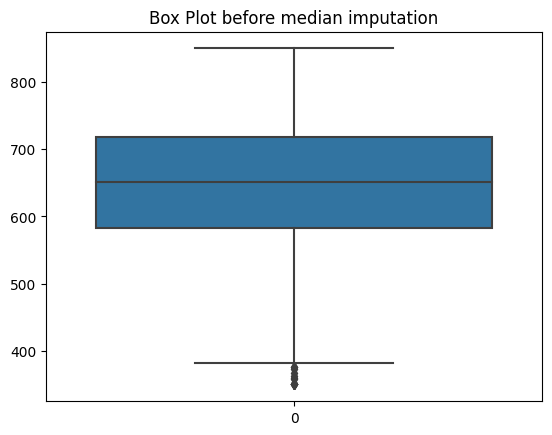

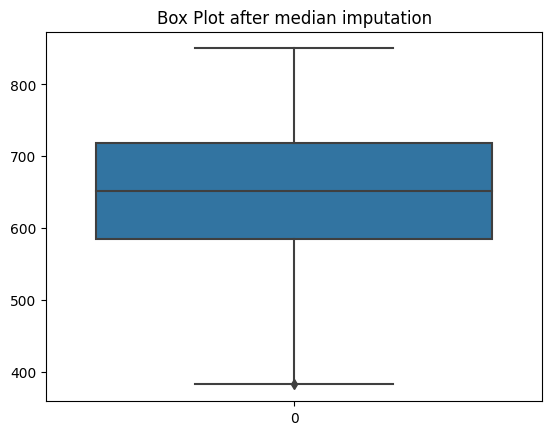

In [176]:
# outliers treatment
# median imputation
import pandas as pd
import numpy as np

sns.boxplot(X_train['CreditScore'])
plt.title("Box Plot before median imputation")
plt.show()
q1 =X_train['CreditScore'].quantile(0.25)
q3 = X_train['CreditScore'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(X_train['CreditScore'])
for i in X_train['CreditScore']:
    if i > Upper_tail or i < Lower_tail:
            X_train['CreditScore'] = X_train['CreditScore'].replace(i, med)
sns.boxplot(X_train['CreditScore'])
plt.title("Box Plot after median imputation")
plt.show()

In [124]:
# /outlier treatment
# - imputation, data removal,max binning , min binning and transformation(log,cube root)
#

# imbalance -> class weight, under ,over, bagging

In [125]:
# 4.Feature Selection
# for feature selection ,we will choose Lasso regression as
#  it has the capability to shrink some of the coefficients to 0 .

In [177]:
X_train.head()

,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7389,Spain,Female,667,34,5,0.00,2,1,0,163830.64,0
9275,Germany,Male,427,42,1,75681.52,1,1,1,57098.00,0
2995,France,Female,535,29,2,112367.34,1,1,0,185630.76,0
5316,Spain,Male,654,40,5,105683.63,1,1,0,173617.09,0
356,Spain,Female,850,57,8,126776.30,2,1,1,132298.49,0


# 6.Encoding categorical variables

In [178]:
# ->6.Encoding categorical variables
cat_vars = [var for var in X_train.columns if X_train[var].dtype == 'O']
def replace_categories(train,test,var,target):

  ordered_labels = train.groupby([var])[target].mean().sort_values().index

  ordinal_label ={k:i for i,k in enumerate(ordered_labels,0)}

  train[var] = train[var].map(ordinal_label)
  test[var] = test[var].map(ordinal_label)

for var in cat_vars:
  replace_categories(X_train, X_test, var, 'Exited')

print(X_train.shape,X_test.shape)
print(X_train.head())

(8000, 11) (2000, 11)
      Geography  Gender  CreditScore  Age  Tenure    Balance  NumOfProducts  \
7389          1       1          667   34       5       0.00              2   
9275          2       0          427   42       1   75681.52              1   
2995          0       1          535   29       2  112367.34              1   
5316          1       0          654   40       5  105683.63              1   
356           1       1          850   57       8  126776.30              2   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
7389          1               0        163830.64       0  
9275          1               1         57098.00       0  
2995          1               0        185630.76       0  
5316          1               0        173617.09       0  
356           1               1        132298.49       0  


#7 Feature engineering , feature scaling

In [179]:
# ->7 Feature engineering , feature scaling
train_vars = [var for var in X_train.columns if var not in ['Exited']]
print(train_vars,len(train_vars))

# import the scale
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(X_train[train_vars])

# transform the train and test set
X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

['Geography', 'Gender', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'] 10


In [180]:
X_train.head()

,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7389,1.0,1.0,0.111940,-0.250000,0.0,-0.759523,1.0,0.0,-1.0,0.645778,0
9275,2.0,0.0,-1.679104,0.416667,-0.8,-0.166132,0.0,0.0,0.0,-0.439480,0
2995,0.0,1.0,-0.873134,-0.666667,-0.6,0.121507,0.0,0.0,-1.0,0.867442,0
5316,1.0,0.0,0.014925,0.250000,0.0,0.069103,0.0,0.0,-1.0,0.745287,0
356,1.0,1.0,1.477612,1.666667,0.6,0.234483,1.0,0.0,0.0,0.325159,0


In [135]:
# modelling

# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [136]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method);
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2);
    return (auc_score, fpr_df, tpr_df)

In [181]:
# model building

from sklearn import model_selection
from numpy import abs
# from sklearn.metrics import mean_squared_error,mean_absolute_error
# from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

models = []
names = []

models.append(('Logistic Regression',LogisticRegression()))
models.append(('Linear svc',LinearSVC()))
models.append(('Random forest classifier',RandomForestClassifier()))
models.append(('knn ',KNeighborsClassifier()))
models.append(('Guassian NB ',GaussianNB()))
models.append(('Decision TreeClassifier',DecisionTreeClassifier()))
models.append(('XGBClassifier',XGBClassifier()))

for name,model in models:
  cv_score = model_selection.cross_val_score(model,X_train,y_train,cv = 20,scoring='accuracy')
  cv_score = np.sqrt(np.abs(cv_score))


  print("name:--->>",name)
  print("----------------------------------")
  print("CV mean Score :{0},CV min:{1},CV std :{2}".format(np.mean(cv_score),np.min(cv_score),np.std(cv_score)))
  print("----------------------------------")

name:--->> Logistic Regression
----------------------------------
CV mean Score :1.0,CV min:1.0,CV std :0.0
----------------------------------
name:--->> Linear svc
----------------------------------
CV mean Score :1.0,CV min:1.0,CV std :0.0
----------------------------------
name:--->> Random forest classifier
----------------------------------
CV mean Score :1.0,CV min:1.0,CV std :0.0
----------------------------------
name:--->> knn 
----------------------------------
CV mean Score :0.9925911435374222,CV min:0.986154146165801,CV std :0.0035807500712473263
----------------------------------
name:--->> Guassian NB 
----------------------------------
CV mean Score :1.0,CV min:1.0,CV std :0.0
----------------------------------
name:--->> Decision TreeClassifier
----------------------------------
CV mean Score :1.0,CV min:1.0,CV std :0.0
----------------------------------
name:--->> XGBClassifier
----------------------------------
CV mean Score :1.0,CV min:1.0,CV std :0.0
---------------

In [153]:
# selecting a model
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

In [154]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      1.00      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [137]:
# Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(X_train.loc[:, X_train.columns != 'Exited'],X_train.Exited)
best_model(log_primal_Grid)

0.8110000000000002
{'C': 0.5, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=0.5, max_iter=250, tol=1e-05)


In [138]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(X_train.loc[:, X_train.columns != 'Exited'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_train_pol2,X_train.Exited)
best_model(log_pol2_Grid)

0.8550000000000001
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=0.1, max_iter=300, solver='liblinear')


In [139]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(X_train.loc[:, X_train.columns != 'Exited'],X_train.Exited)
best_model(SVM_grid)

0.8551246360521514
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, gamma=0.1, probability=True)


In [140]:
# Fit SVM with pol kernel
param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(X_train.loc[:, X_train.columns != 'Exited'],X_train.Exited)
best_model(SVM_grid)

0.85599947980996
{'C': 100, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=100, gamma=0.1, kernel='poly', probability=True)


In [141]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(X_train.loc[:, X_train.columns != 'Exited'],X_train.Exited)
best_model(xgb_grid)

0.8643749999999999
{'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [142]:
# Fit primal logistic regression
log_primal = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='auto',n_jobs=None,
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(X_train.loc[:, X_train.columns != 'Exited'],X_train.Exited)

LogisticRegression(C=1, max_iter=250, tol=1e-05)

In [143]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(X_train.loc[:, X_train.columns != 'Exited'])
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='auto', n_jobs=None,
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(X_train,X_train.Exited)

LogisticRegression(C=10, max_iter=300, solver='liblinear')

In [144]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(X_train.loc[:, X_train.columns != 'Exited'],X_train.Exited)

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [145]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=None, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0,
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(X_train.loc[:, X_train.columns != 'Exited'],X_train.Exited)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.01,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=7, max_leaves=None, min_child_weight=5, missing=None,
              monotone_constraints=None, multi_strategy=None, n_estimators=20,
              n_jobs=1, nthread=None, num_parallel_tree=None, ...)

In [146]:
print(classification_report(X_train.Exited, log_primal.predict(X_train.loc[:, X_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6368
           1       0.61      0.21      0.32      1632

    accuracy                           0.81      8000
   macro avg       0.72      0.59      0.60      8000
weighted avg       0.78      0.81      0.77      8000



In [147]:
X_train

,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7389,1.0,1.0,0.111940,-0.250000,0.0,-0.759523,1.0,0.0,-1.0,0.645778,0
9275,2.0,0.0,-1.679104,0.416667,-0.8,-0.166132,0.0,0.0,0.0,-0.439480,0
2995,0.0,1.0,-0.873134,-0.666667,-0.6,0.121507,0.0,0.0,-1.0,0.867442,0
5316,1.0,0.0,0.014925,0.250000,0.0,0.069103,0.0,0.0,-1.0,0.745287,0
356,1.0,1.0,1.477612,1.666667,0.6,0.234483,1.0,0.0,0.0,0.325159,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,2.0,1.0,-0.432836,-0.416667,-0.2,0.181940,1.0,0.0,0.0,0.636944,0
4859,1.0,1.0,1.059701,-1.250000,-0.2,0.137760,0.0,0.0,0.0,0.075581,0
3264,0.0,0.0,0.641791,-0.166667,0.0,0.504967,1.0,0.0,-1.0,0.824727,0
9845,1.0,1.0,-0.462687,0.083333,0.8,-0.759523,1.0,0.0,0.0,0.492440,0


In [149]:
X_train.columns

Index(['Geography', 'Gender', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [150]:
print(classification_report(X_train.Exited,  SVM_POL.predict(X_train.loc[:, X_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      6368
           1       0.80      0.37      0.51      1632

    accuracy                           0.85      8000
   macro avg       0.83      0.67      0.71      8000
weighted avg       0.85      0.85      0.83      8000

